<a href="https://colab.research.google.com/github/AadityaAdh/functional_api_model_subclassing/blob/main/functional_api_model_sub_classing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#functional api

simply vannu parda functional api use chai yedi timlai 2 oota outpu chaiya xa vanae

yedi classification ni garnu xa aani regression ni garnu xa vanae testo bela functional api use garni

lets say we have 5 layers as

[l1]   [l2]    [l3]   [l4]      [l5]

aaba hamlae model banauda squence mai hunu parxa vanni xaina yo layer haru

yeuta ko output aarko jun sukai ma pathauna sakinxa



basically you are able to create something like this as shown in figure



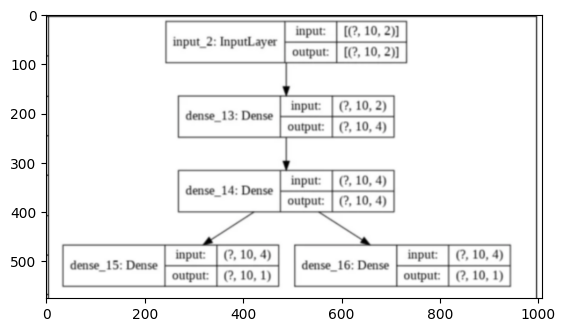

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
path="/content/functional.png"
img=mpimg.imread(path)
plt.imshow(img)
plt.show()


#malaria_detection using functional api

functional api for

regression task for where is the location of parasite
and classification for wheather the cell have malaria or not

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [3]:
dataset,dataset_info=tfds.load('malaria',with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete0LT890/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [4]:
type(dataset)

dict

In [5]:
dataset.keys()

dict_keys([Split('train')])

In [6]:
datas=dataset['train']

In [7]:
type(datas)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [8]:
for element in datas.take(1):
  print(type(element))

<class 'dict'>


In [9]:
datas

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [10]:
for element in datas.take(1):
  print(element.keys())

dict_keys(['image', 'label'])


In [11]:
for element in datas.take(1):
  print(element['image'])

tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(103, 103, 3), dtype=uint8)


In [12]:
train_ratio=0.6
val_ratio=0.2
test_ratio=0.2
#dataset ko access garna .take use garnu jailae ni
#loop chalayae ra element access garni

In [13]:
def splitter(datas,train_ratio,val_ratio,test_ratio):
  train_dataset=datas.take(int(train_ratio*len(datas)))
  rem_dataset=datas.skip(int(train_ratio*len(datas)))
  val_dataset=rem_dataset.take(int(val_ratio*len(datas)))
  to_skip=len(train_dataset)+len(val_dataset)
  rem_dataset=datas.skip(to_skip)
  test_dataset=rem_dataset.take(int(test_ratio*len(datas)))
  return train_dataset,val_dataset,test_dataset


In [14]:
train_dataset,val_dataset,test_dataset=splitter(datas,train_ratio,val_ratio,test_ratio)

In [15]:
len(train_dataset)

16534

In [16]:
len(val_dataset)

5511

In [17]:
len(test_dataset)

5511

#visualization

lets visualize 10 train images with their labels

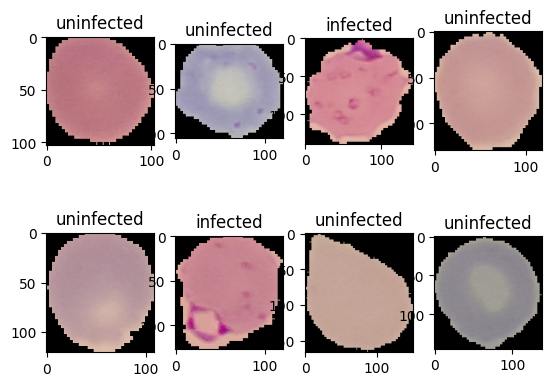

In [18]:
for i,element in enumerate(train_dataset.take(8)):
  plt.subplot(2,4,i+1)
  plt.imshow(element['image'])

  l = "uninfected" if element['label'] == 1 else "infected"
  plt.title(l)


#preprocessing

as size of all images are not same
we do need to

1.resize


also we have to normalize

2.normalize

In [19]:
def resizer_normalizer(dict):
  im_size=224
  return tf.image.resize(dict['image'],(im_size,im_size))/255,dict['label']


In [20]:
train_dataset=train_dataset.map(resizer_normalizer)

In [21]:
val_dataset=val_dataset.map(resizer_normalizer)

In [22]:
test_dataset=test_dataset.map(resizer_normalizer)

In [23]:
train_dataset=train_dataset.shuffle(
    buffer_size=8, reshuffle_each_iteration=True,name=None
).batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
val_dataset=val_dataset.shuffle(
    buffer_size=8, reshuffle_each_iteration=True,name=None
).batch(32).prefetch(tf.data.AUTOTUNE)

#Functional Api

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization,Input,Layer
#functional api vanni ko input ho sequential vanni ma input layer nai hunxa
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers  import Adam


#Feature Extractor model

In [26]:
IM_SIZE=224
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name="input image")
x= Conv2D(filters=6,kernel_size=3,strides=1,padding="valid",activation="relu")(func_input)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=2,strides=2)(x)
x=Conv2D(filters=16,kernel_size=3,strides=1,padding="valid",activation="relu")(x)
x=BatchNormalization()(x)
output=MaxPool2D(pool_size=2,strides=2)(x)

feature_extractor_model=Model(func_input,output,name="Feature_Extractor")
feature_extractor_model.summary()

Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)

#now lets call this feature extractor
mening the tensorflow models are callable
you need to pass in the input then it will give you the outputs


In [27]:
#now lets pass in the input to the feature extractor model and it will giuve the outputs
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name="Input Image")
x=feature_extractor_model(func_input)
x=Flatten()(x)

x= Dense(100,activation="relu")(x)
x=BatchNormalization()(x)

x=Dense(10,activation="relu")(x)
x=BatchNormalization()(x)

func_output=Dense(1,activation="sigmoid")(x)


lenet_model_func=Model(func_input,func_output,name="Lenet_Model")
lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Functio  (None, 54, 54, 16)        1136      
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 46656)             0         
                                                                 
 dense (Dense)               (None, 100)               4665700   
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 10)                

In [28]:
#note aagadi ko nome vanae ko batching ko lagi ho jastai image haru aarange gare ra video banako jasto


x=....(x)
yesto gari rahanu vanda tyo feature extractor vanni ta sequentail ho vanni tha xa so we can use sequential api to create our feature extractor model

In [29]:
feature_extractor_seqmodel=tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),
    Conv2D(filters=6,kernel_size=3,strides=1,padding="valid",activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),
    Conv2D(filters=16,kernel_size=5,strides=1,padding="valid",activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2)

])
feature_extractor_seqmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 16)      2416      
                                                                 
 batch_normalization_5 (Bat  (None, 107, 107, 16)      64        
 chNormalization)                                                
                                                        

In [30]:
#using this upper sequential feature extractor
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name="Input Image")
x=feature_extractor_seqmodel(func_input)
x=Flatten()(x)

x= Dense(100,activation="relu")(x)
x=BatchNormalization()(x)

x=Dense(10,activation="relu")(x)
x=BatchNormalization()(x)

func_output=Dense(1,activation="sigmoid")(x)


lenet_model_func=Model(func_input,func_output,name="Lenet_Model")
lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 53, 53, 16)        2672      
                                                                 
 flatten_1 (Flatten)         (None, 44944)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4494500   
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                       

#Model subclassing

In [32]:
class FeatureExtractor(Layer):
  def __init__(self,filters,kernel_size,strides,padding,activation,pool_size):
    super(FeatureExtractor,self).__init__()
    self.conv_1= Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding,activation=activation)
    self.batch_1=BatchNormalization()
    self.pool_1=MaxPool2D(pool_size=pool_size,strides=2*strides)
    self.conv_2= Conv2D(filters=filters*2,kernel_size=kernel_size,strides=strides,padding=padding,activation=activation)
    self.batch_2=BatchNormalization()
    self.pool_2=MaxPool2D(pool_size=pool_size,strides=2*strides)
    #tyo stide ma 1 pathauni vayae ra 2*strides garya matrai ho yellai pani parameters banaye ra garna milxa

  def call(self,x,training):
    x=self.conv_1(x)
    x=self.batch_1(x)
    x=self.pool_1(x)
    x=self.conv_2(x)
    x=self.batch_2(x)
    x=self.pool_2(x)
    return x


#creating object of this class

feature_sub_classed=FeatureExtractor(8,3,1,"valid","relu",2)








#creating a classed model using this feature extractor class

In [33]:
class LenetModel(Model):
  def __init__(self,filters,kernel_size,strides,padding,activation,pool_size):
    super(LenetModel,self).__init__()
    self.feature_extractor=FeatureExtractor(8,3,1,"valid","relu",2)
    self.flatten=Flatten()
    self.dense_1= Dense(100,activation="relu")
    self.batch_1=BatchNormalization()
    self.dense_2=Dense(10,activation="relu")
    self.batch_2=BatchNormalization()
    self.dense_3=Dense(1,activation="sigmoid")
  def call(self,x,training):
    x=self.feature_extractor(x)
    x=self.flatten(x)
    x=self.dense_1(x)
    x=self.batch_1(x)
    x=self.dense_2(x)
    x=self.batch_2(x)
    x=self.dense_3(x)
    return x

lenet_sub_classed=LenetModel(8,3,1,"valid","relu",2)
lenet_sub_classed(tf.zeros([1,224,224,3]))
lenet_sub_classed.summary()






Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_2 (Featu  multiple                  1488      
 reExtractor)                                                    
                                                                 
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_6 (Dense)             multiple                  4665700   
                                                                 
 batch_normalization_14 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_7 (Dense)             multiple                  1010      
                                                                 
 batch_normalization_15 (Ba  multiple                  

In [34]:
lenet_sub_classed.compile(optimizer=Adam(learning_rate=0.01),
                          loss=BinaryCrossentropy(),
                          metrics='accuracy')

In [35]:
history=lenet_sub_classed.fit(train_dataset,validation_data=val_dataset,epochs=5,verbose=1)

Epoch 1/5
517/517 [==============================] - 45s 76ms/step - loss: 0.6274 - accuracy: 0.6563 - val_loss: 0.7119 - val_accuracy: 0.6474
Epoch 2/5
517/517 [==============================] - 35s 68ms/step - loss: 0.3626 - accuracy: 0.8431 - val_loss: 0.8434 - val_accuracy: 0.5565
Epoch 3/5
517/517 [==============================] - 36s 70ms/step - loss: 0.2195 - accuracy: 0.9213 - val_loss: 0.4005 - val_accuracy: 0.7908
Epoch 4/5
517/517 [==============================] - 43s 82ms/step - loss: 0.1960 - accuracy: 0.9311 - val_loss: 0.4253 - val_accuracy: 0.8938
Epoch 5/5
517/517 [==============================] - 37s 72ms/step - loss: 0.1783 - accuracy: 0.9380 - val_loss: 0.1858 - val_accuracy: 0.9354


In [47]:
class mylayer(Layer):
  def __init__(self,output_units,activation):
    super(mylayer,self).__init__()
    self.output_units=output_units
    self.activation=activation
  def build(self,input_features_shape):
    self.w=self.add_weight(shape=(input_features_shape[-1],self.output_units),initializer="random_normal",trainable=True)
    self.b=self.add_weight(shape=(self.output_units,),initializer="random_normal",trainable=True)

  def call(self,input_features):
    if (self.activation == "relu"):
      return tf.nn.relu(tf.matmul(input_features,self.w)+self.b)
    elif (self.activation =="sigmoid"):
      return tf.math.sigmoid(tf.matmul(input_features,self.w)+self.b)
    else:
      return tf.matmul(input_features,self.w)+self.b





#why custom classes

yedi timlai paila ma wx+b garxu aani square garxu aathawa aaru jpt garxu aani activation function ma pathauxu vanni lagyo vaane custom banaunu parxa
natra vanae ta sidai garda vai halxa


In [49]:
#lets use this in our sequential layer
img_size=224
model=tf.keras.Sequential([
    InputLayer(input_shape=(img_size,img_size,3)),
    Conv2D(filters=6,kernel_size=3,strides=1,padding="valid",activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Conv2D(filters=16,kernel_size=3,strides=1,padding="valid",activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Flatten(),

    mylayer(1000,activation="relu"),
    BatchNormalization(),

    mylayer(100,activation="relu"),
    BatchNormalization(),

    mylayer(1,activation="sigmoid")
])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_32 (Ba  (None, 222, 222, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 111, 111, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_33 (Ba  (None, 109, 109, 16)      64        
 tchNormalization)                                               
                                                      